## Recursion

![Recursion](https://imgs.xkcd.com/comics/fixing_problems.png)

From: https://xkcd.com/1739/

## Key Concepts

- Recursion
- Base Case
- Recursive Case
- Call Stack
- Tail Call Optimization

## Resources


- [Recursion](https://en.wikipedia.org/wiki/Recursion_(computer_science))
- [Tail Call Optimization](https://en.wikipedia.org/wiki/Tail_call)

## Reduction

Reduction is the single most common technique used in designing algorithms.
Reducing one problem X to another problem Y means to write an algorithm
for X that uses an algorithm for Y as a black box or subroutine. Crucially, the
correctness of the resulting algorithm for X cannot depend in any way on how
the algorithm for Y works. The only thing we can assume is that the black box
solves Y correctly. The inner workings of the black box are simply none of our
business; they’re somebody else’s problem. It’s often best to literally think of the
black box as functioning purely by magic.

## Recursion - loose definition

### Simplify and Delegate

Recursion  is a particularly powerful kind of reduction, which can be described
loosely as follows:

• If the given instance of the problem can be solved directly, solve it directly.

• Otherwise, reduce it to one or more simpler instances of the same problem.

If the self-reference is confusing, it may be helpful to imagine that someone else
is going to solve the simpler problems, just as you would assume for other types
of reductions. I like to call that someone else the Recursion Fairy. Your only
task is to simplify the original problem, or to solve it directly when simplification
is either unnecessary or impossible; the Recursion Fairy will solve all the simpler
subproblems for you, using Methods That Are None Of Your Business So Butt
22 Out.

 Mathematically sophisticated readers might recognize the Recursion Fairy
by its more formal name: the Induction Hypothesis.

# Recursion examples

* adopted from: https://github.com/rasbt/algorithms_in_ipython_notebooks

* https://github.com/AbhishekSinhaCoder/Data-Structures-Concepts-through-Notebook

* https://jeffe.cs.illinois.edu/teaching/algorithms/book/01-recursion.pdf

# Examples using Recursion

**Important Note**

For most cases, using function recursion should be avoided in Python are better be implemented using for/while loops most of the time (although, I must admit that recursive solutions do look elegant). One of the reasons is that stacking recursive calls can easily blow up memory or at least result in the popular yet nasty "RuntimeError: maximum recursion depth exceeded". Also, keep in mind that Python does not optimize tail recursion in favor of having the full tracebacks for debugging; related to that, please see Guido van Rossums blog posts "[Tail Recursion Elimination](http://neopythonic.blogspot.com.au/2009/04/tail-recursion-elimination.html)" and "[Final Words on Tail Calls](http://neopythonic.blogspot.com.au/2009/04/final-words-on-tail-calls.html)." If you do like to play around with recursion more efficiently, I highly recommend taking a look at [Haskell](https://www.haskell.org) or other functional programming languages. That being said, below are some examples of recursive function implementations in Python for illustrative purposes.

## Review: Running time and big-$\mathcal{O}$: Recursive Algorithms for Computing Powers

As example of the use of linear recursion, we consider the problem of raising a number $x$ to an arbitrary nonnegative integer, $n$. That is, we wish to compute the power function, defined as $power(x,n) = xn$. (We use the name “power” for this discussion, to differentiate from the built-in Python function _pow_ that provides such functionality.) We will consider two different recursive formulations for the problem that lead to algorithms with very different performance.
A trivial recursive definition follows from the fact that $x^n = x \cdot x^{n−1}$ for $n > 0$.


\begin{equation}
power(x,n) ==\left\{
                \begin{array}{ll}
                        1 \ if \ n = 0\\
                        x \ power(x, n − 1) \ otherwise.
                \end{array}
              \right.
\end{equation}

This definition leads to a recursive algorithm shown below:

In [ ]:
# in case we did not know about Pythons x**n statement :)

In [2]:
2**0, 5235235253**0, -5325223**0 # we are not going to deal with negative numbers actually for this example... :)

(1, 1, -1)

In [ ]:
# so let's see our reductive step in action

In [3]:
2**8, 2**7 * 2 # should be same :)

(256, 256)

In [4]:
# so the idea is to reduce the problem to a simpler instance of the same problem
## to start with we need a base case
## so base case for power would be x to 0 which is 1
2**0

1

## Basic (naive) power function - recursive

In [5]:
def basicpower(x, n, debug=False):
    '''Compute the value x**n for integer n.'''
    if debug:
        print('x =', x, 'n =', n)
    if n == 0:
        return 1 # base case without base case our recursive function will run forever
    return x  * basicpower(x, n-1, debug) # our recursive call so we are calling the function on itself on a smaller problem space

In [6]:
basicpower(2, 8)

256

In [7]:
basicpower(2,5, debug=True) # so we can see the call stack with debug

x = 2 n = 5
x = 2 n = 4
x = 2 n = 3
x = 2 n = 2
x = 2 n = 1
x = 2 n = 0


32

In [8]:
basicpower(5, 3, debug=True)

x = 5 n = 3
x = 5 n = 2
x = 5 n = 1
x = 5 n = 0


125

In [9]:
# not going to work on negative numbers
basicpower(5, -3)
# similarly it would break on fractions like 2.5

RecursionError: maximum recursion depth exceeded

# How to make a recursive function in two easy steps
* figure out the base case
* figure out how to reduce problem to a subset of the same problem

In [10]:
basicpower(2,8)

256

A recursive call to this version of power(x,n) runs in $\mathcal{O}(n)$ time.

In [11]:
basicpower(2,900)

8452712498170643941637436558664265704301557216577944354047371344426782440907597751590676094202515006314790319892114058862117560952042968596008623655407033230534186943984081346699704282822823056848387726531379014466368452684024987821414350380272583623832617294363807973376

In [12]:
# let's figure out system recursion limit
import sys
sys.getrecursionlimit()

1000

In [13]:
# let's change it to 10000
sys.setrecursionlimit(10000)
print(f"Recursion limit changed to {sys.getrecursionlimit()}")

Recursion limit changed to 10000


In [14]:
basicpower(2,5000)

1412467032139426036835209667016147333668896175184541116813688085857118169842707512558089126316711526373356032084313660827642038380699793383359711857266399234310517778518653990118779996451317070693734982126313237525531112153728440359509005359548607334184534055755667368015655874054646996404990508496994723579009056175713766182282164342131815209915566771264986517822041740618309392391768613413832940182402258386927255961470051442432810752756294953390938131989667356336063296910238424541258358886568731339812872409800088380736682218042644329108940307890202194405781984882673397682388722799021574203072475705104238458688725967358918058187277964357530185180866413560128513025467268230092502183280182519073402454498631832656379878621985110463629854619495872811191399072280043859428809539588165545676252960869168857748289344499413624165886753269403325611036645569826222068344742198110818724049295034819913767403798259987914118798027175838854985751152994717434692411170702303981033786152327937102909926564448

In [15]:
%%timeit
basicpower(2,1000)

412 µs ± 62.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%%timeit
2**1000 # so we are testing our built in power

950 ns ± 263 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [17]:
%%timeit
2**2000

1.78 µs ± 296 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [18]:
%%timeit
basicpower(2,2000)

581 µs ± 77.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%%timeit
# lets time it on smaller number such as 100
basicpower(2,100)

21.4 µs ± 3.9 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [20]:
%%timeit
2**100

184 ns ± 44.9 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [21]:
import sys
print(sys.getrecursionlimit())

10000


In [22]:
# so one of the practical issues with timing is that
# we tend to assume that dealing with large numbers takes as much time as with small
# in reality large numbers add overhead
basicpower(2,950)

9516908214257811601907599988159363584840065290620124537956939899622020205826587990689077212775400643774711832257235027522909345571487396529861315719055325605011013378863743193233193022939505515969530853007049198118833591724018432564205433218231411731277088674906521042072098232413978624

In [ ]:
basicpower(2,975)

319334449525555169865019634085894170570792201669673206640407558789953902699034250525593274478821712174294791495070799239035590078142974985718267487725573027251200907672173708242806035431098077949224537079127027838932929672819339262222216842951687065201139345100120966662777359236855041588461568

In [ ]:
basicpower(2, 960)

9745314011399999080353382387875188310876226857595007526867906457212948690766426102465615065882010259225304916231408668183459169865203094046577987296312653419531277699956473029870789655490053648352799593479218378873685597925394874945746363615468965612827738803104277547081828589991914110976

In [ ]:
basicpower(2, 968)

2494800386918399764570465891296048207584314075544321926878184053046514864836205082231197456865794626361678058555240619054965547485491992075923964747856039275400007091188857095646922151805453733978316695930679904991663513068901087986111069085560055196883901133594695052052948119037930012409856

In [ ]:
basicpower(2, 964)

155925024182399985285654118206003012974019629721520120429886503315407179052262817639449841054112164147604878659702538690935346717843249504745247796741002454712500443199303568477932634487840858373644793495667494061978969566806317999131941817847503449805243820849668440753309257439870625775616

In [ ]:
basicpower(2,962)

38981256045599996321413529551500753243504907430380030107471625828851794763065704409862460263528041036901219664925634672733836679460812376186311949185250613678125110799825892119483158621960214593411198373916873515494742391701579499782985454461875862451310955212417110188327314359967656443904

In [ ]:
basicpower(2,961)

19490628022799998160706764775750376621752453715190015053735812914425897381532852204931230131764020518450609832462817336366918339730406188093155974592625306839062555399912946059741579310980107296705599186958436757747371195850789749891492727230937931225655477606208555094163657179983828221952

In [ ]:
sys.setrecursionlimit(6000) # we can change the limit but still there are limits to our recursion limit raising..

In [ ]:
%%timeit
basicpower(2,1000)

257 µs ± 23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
basicpower(2,2000)

598 µs ± 33.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
basicpower(2,4000)

: 

In [ ]:
basicpower(2,5960)

1376493475894892137615361268516964587819058903389375253788229580683845876586533026634998184523785726764037677776452826060925206043989132366291583323446386552979606690294480797920999243492469794955967761141592492949450231385779169752230519504948137719913718374207661068196381688420087501394573090422775519796603416432644072377802529018439857039350092982495320382852457083435960245887932796154789038639252284772688948284866220269737851725590662905853599967554188798968987076138748295550352599395997864176982293950284007681570297389499176662488599570353161408614230646398813712867401270913951060978484046928860822499476606797714421820563778578345749973635337561819481436555819307561386507040210551649623900770506060672356486161441905229325880636708141248206686807095538616335110442121202341691117336013618719488064592721545463983737195220266562764349183114377296630673124414319109841669147380782179462348593809515175631267905003898350292162003771674684795308904747080448174800174822684507245802952543734

In [ ]:
basicpower(2,5961)

2752986951789784275230722537033929175638117806778750507576459161367691753173066053269996369047571453528075355552905652121850412087978264732583166646892773105959213380588961595841998486984939589911935522283184985898900462771558339504461039009896275439827436748415322136392763376840175002789146180845551039593206832865288144755605058036879714078700185964990640765704914166871920491775865592309578077278504569545377896569732440539475703451181325811707199935108377597937974152277496591100705198791995728353964587900568015363140594778998353324977199140706322817228461292797627425734802541827902121956968093857721644998953213595428843641127557156691499947270675123638962873111638615122773014080421103299247801541012121344712972322883810458651761273416282496413373614191077232670220884242404683382234672027237438976129185443090927967474390440533125528698366228754593261346248828638219683338294761564358924697187619030351262535810007796700584324007543349369590617809494160896349600349645369014491605905087469

In [ ]:
basicpower(2,5962)

RecursionError: ignored

In [23]:
# let's write a simple power function just loop based without any optimization
def simple_loop_power(x, n):
    if n <= 0:
        return 1
    result = x
    for i in range(n-1):
        result *= x
    return result

# let's test with 2 to 8th
simple_loop_power(2,8)

256

In [24]:
%%timeit
simple_loop_power(2,1000)

101 µs ± 27.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
# not satisfied with performance of our basic power we have an improvement in mind

## Improved Power Function

The big idea for improved power is to use identity

x^n = x^(n/2)*x(n/2) - for even n

x^n = x^((n-1)/2)*x((n-1)/2)*x - for odd n

In [27]:
2**8, 2**(8//2)*2**(8//2) # we want integers

(256, 256)

In [25]:
5 // 2, 6 // 2, 7 // 2, 8 //2 # so // gives you the integer part of the division

(2, 3, 3, 4)

In [28]:

def power(x, n):
    '''Compute the value x**n for integer n.'''
    if n == 0: # this is our base case
        return 1

    # we still do recursion we just do not do it at the end
    # so for our recursive call we need floor that is why we are using //
    partial = power(x, n // 2) # remember that x^4*x^4 == x^8 because 4+4 = 8
    # // means that we keep only the integer part of the division in Python 3
    result = partial * partial
    # we skip over the part where * is implemented
    if n % 2 == 1:  # for odd powers we need to multiply by the number
        result *= x
    # time.sleep(0.01)
    return result

In [29]:
# Let's test it out on even numbers
power(2,8)

256

In [30]:
# Let's check odd powers
power(2,9)

512

In [31]:
# last thing to check is base
power(2,0)

1

In [ ]:
# still fail on negative power
power(3, -5)

RecursionError: ignored

In [32]:
import math


In [33]:
math.log2(1024)

10.0

In [ ]:
math.log2(1024*1024)

20.0

In [ ]:
math.log2(10**100) # log n of googool more atoms in the universe

332.19280948873626

In [ ]:
# so if we were playing the guess the number with yes and no questions we could figure out any number up to googool in 333 questions

# not bad when we consider that number of atoms in Universe is something 10**80

In [34]:
%%timeit
power(2,1000)

2.12 µs ± 126 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [35]:
%%timeit
power(2,2000)

3.04 µs ± 68.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [36]:
%%timeit
power(2,4000)

5.98 µs ± 115 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [37]:
%%timeit
power(2,2_000_000) # rememer this would never work on basicpower!!

7.66 ms ± 418 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [38]:
%%timeit
2**2_000_000

7.96 ms ± 607 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
2**2000

1000000 loops, best of 5: 1.8 µs per loop


In [ ]:
%%timeit
2**2_000_000

9.43 ms ± 99.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [39]:
math.pow(2,8)

256.0

In [40]:
%%timeit
math.pow(2,1_000)

135 ns ± 31.4 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
math.pow(2,1_000)

1.0715086071862673e+301

In [ ]:
2**1_000

10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376

In [ ]:
%%timeit
math.pow(2,1_010)

260 ns ± 31.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


To analyze the running time of the revised algorithm, we observe that the exponent in each recursive call of function power(x,n) is at most half of the preceding exponent. As we saw with the analysis of binary search, the number of times that we can divide $n$ in half before getting to one or less is $\mathcal{O}(log n)$. Therefore, our new formulation of the power function results in $\mathcal{O}(logn)$ recursive calls. Each individual activation of the function uses $\mathcal{O}(1)$ operations (excluding the recursive calls), and so the total number of operations for computing power(x,n) is O(logn). This is a significant improvement over the original $\mathcal{O}(n)$-time algorithm.

**Exercise:** Test the two functions with a timer and see the difference. Identify the base case and stopping conditions.

# We humans operate better on visual data - 1 picture and 1000 words

In [41]:
# to set up a generic timer function we will Python's ability to unpack arguments
power(*[52542,3])

145050690404088

In [42]:
power(52542,3) # above unpacking/unrolling is same as this row

145050690404088

In [43]:
# in python we can pass functions as arguments
from IPython.utils import io as iuio
import matplotlib.pyplot as plt
import time
def automatic_time(input_array, func_name):
    # input_array contains all elements of input,
    #   preferably sorted from small to big,
    #   each element could also be a tuple, which is requried
    #   for functions that need more than 1 input
    # func_name is the name of the function (as object, not str)
    # this function also suppresses printing output from the {func_name}
    ret = []
    for val in input_array:
#         print(time.process_time_ns())
#         start = time.process_time()
        start = time.time()
        with iuio.capture_output() as suppressed:
            if isinstance(val, tuple):
                _ = func_name(*val) #unrolling the tuple to pass multiple arguments to our function
            else:
                _ = func_name(val) # just a single argument function

        ret.append((time.time() - start)) # 10e9 converts unit from second to nanosecond
    return ret

my_input_arr = [(2,500),(2,1_000),(2,2_000)]
print("testing function_1 with the automatic measure")
print(f"run-time for function 1 result in seconds: \n{automatic_time(my_input_arr, basicpower)}")

testing function_1 with the automatic measure
run-time for function 1 result in seconds: 
[0.00046896934509277344, 0.0003991127014160156, 0.0006709098815917969]


In [44]:
automatic_time(my_input_arr, basicpower)

[0.0004119873046875, 0.00040149688720703125, 0.0007712841033935547]

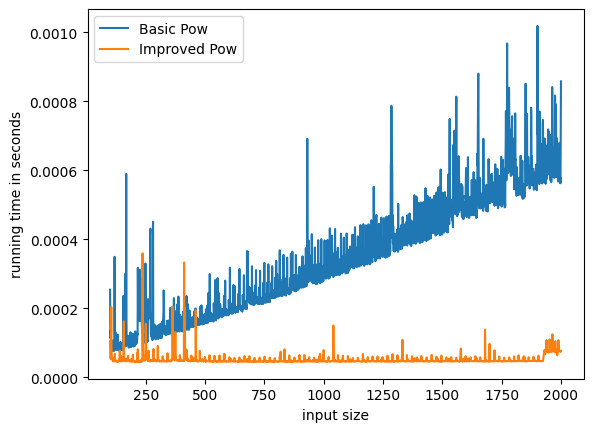

In [45]:
STEP = 1
input_arr = [(2,i) for i in range(100, 2_000+1, STEP)]

# input_arr_t = [(i,i) for i in range(1, 1000)]

# fun1 = automatic_time(input_arr, function_1)
results = automatic_time(input_arr, basicpower) # this is the linear (not so good here)
results_2 = automatic_time(input_arr, power) # so power is the good function (log based)
# fun3 = automatic_time(input_arr, function_3)
# fun4 = automatic_time(input_arr_t, function_4)
# fun5 = automatic_time(input_arr_t, function_5)

plt.plot([el[1] for el in input_arr], results, label="Basic Pow") # we only want to see the i as x
plt.plot([el[1] for el in input_arr], results_2, label="Improved Pow")
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.legend()
plt.show()

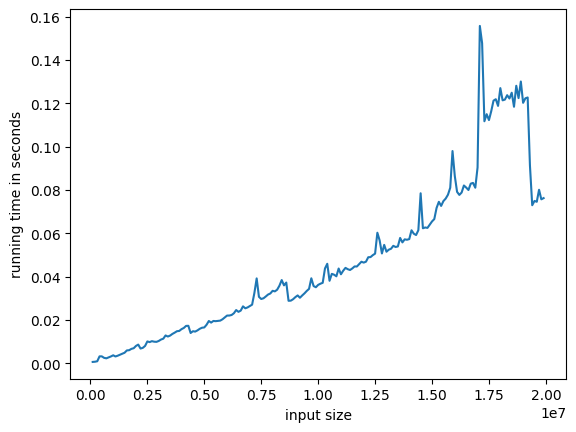

In [46]:
input_arr = [(2,i) for i in range(100_000, 20_000_000, 100_000)]

results = automatic_time(input_arr, power)

# mathpow_results = automatic_time(input_arr, math.pow) # math.pow does n ot like large powers

plt.plot([el[1] for el in input_arr], results)
# plt.plot([el[1] for el in input_arr], mathpow_results)
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()
# so there is some overhead when dealing with truly large numbers

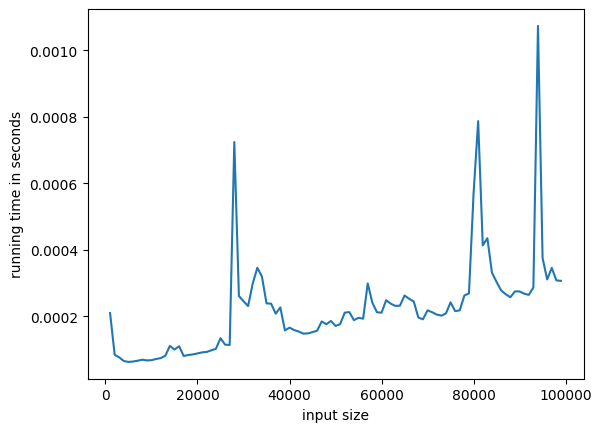

In [47]:
input_arr = [(2,i) for i in range(1_000, 100_000, 1_000)]

results = automatic_time(input_arr, power)
# mathpow_results = automatic_time(input_arr, math.pow) # math.pow does n ot like large powers

plt.plot([el[1] for el in input_arr], results)
# plt.plot([el[1] for el in input_arr], mathpow_results)
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

In [ ]:
math.pow(2,800_000)

# so it certainly looks linear but the jumps in our speed indicates how OS and computer hardware might affect an algorithm in real life

## Factorial

In [ ]:
# so again base case for stopping will be 1

In [48]:
from math import factorial

In [49]:
factorial(5) # 5*4*3*2*1 == 120

120

In [51]:
factorial(0) #this will be our base case

1

In [52]:
def rec_factorial(x):
    if x <= 1:
        return 1 # not x! as factorial of 0 is considered 1!

    return x * factorial(x-1) # so we want to be sure that our problem space keeps getting smaller

In [53]:
import math
math.factorial(0)

1

In [54]:
math.factorial(5),math.factorial(6)

(120, 720)

In [55]:
# regular loop based algorithm should need less memory
def factorial_loop(x):
    res = 1  # try not to put 0 as a multiplier...
    # we start at the end and go backwards
    while x > 1:
        res *= x
        x -=1
    return res

In [56]:
def factorial_for_loop(x):
    res = 1  # try not to put 0 as a multiplier...
    # here we start at beginning
    for n in range(2,x+1):
        res*=n
    return res

In [57]:
factorial_loop(5), factorial_for_loop(5), rec_factorial(5), math.factorial(5)

(120, 120, 120, 120)

In [58]:
factorial(1)

1

5! = 5 x 4 x 3 x 2 x 1 = 120

In [59]:
%%timeit
factorial(10)

71.4 ns ± 18.9 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
!python --version

Python 3.10.7


In [60]:
%%timeit
rec_factorial(10)

148 ns ± 34.8 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [61]:
%%timeit
factorial_loop(10)

524 ns ± 9.19 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [62]:
%%timeit
factorial_for_loop(10)

428 ns ± 20.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [63]:
%%timeit
factorial(2000)

262 µs ± 48.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [64]:
%%timeit
rec_factorial(2000)

160 µs ± 20.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [65]:
%%timeit
factorial_loop(2000)

1.26 ms ± 324 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [66]:
%%timeit
factorial_for_loop(2000)

1.13 ms ± 271 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
factorial(5000)

ValueError: Exceeds the limit (4300) for integer string conversion

In [69]:
 sys.get_int_max_str_digits()

4300

In [70]:
len(str(factorial(20)))

19

In [71]:
len(str(factorial(50)))

65

In [72]:
len(str(factorial(200)))

375

In [73]:
sys.set_int_max_str_digits(100_000)

In [74]:
len(str(factorial(2000)))

5736

In [ ]:
%%timeit
math.factorial(1_000)

10000 loops, best of 5: 37.3 µs per loop


In [ ]:
%%timeit
math.factorial(2_000)

10000 loops, best of 5: 136 µs per loop


In [ ]:
%%timeit
factorial(5000) #

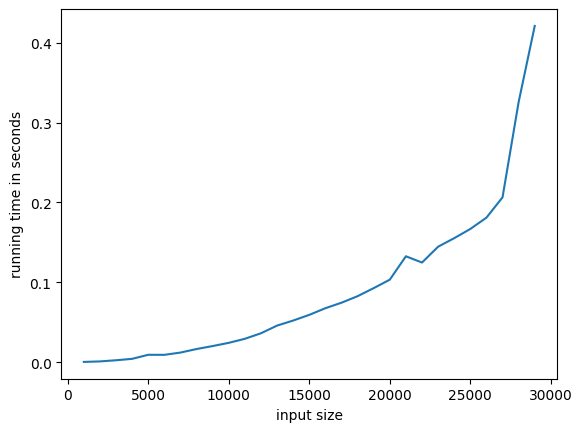

In [75]:
input_arr = [i for i in range(1_000, 30_000, 1_000)]

fun2 = automatic_time(input_arr, factorial_loop)
plt.plot(input_arr, fun2)
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

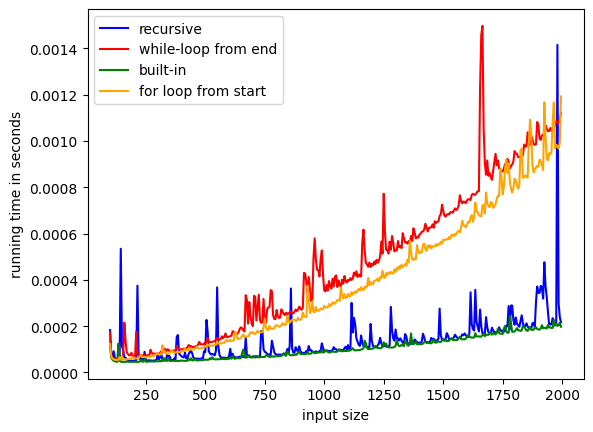

In [76]:
STEP = 5
input_arr = [i for i in range(100, 2_000, STEP)]

fun1 = automatic_time(input_arr, rec_factorial)
plt.plot(input_arr, fun1, color='blue', label="recursive")
fun2 = automatic_time(input_arr, factorial_loop)
plt.plot(input_arr, fun2, color='red', label="while-loop from end")
fun3 = automatic_time(input_arr, factorial)
plt.plot(input_arr, fun3, color='green', label="built-in")
fun4 = automatic_time(input_arr, factorial_for_loop)
plt.plot(input_arr, fun4, color='orange', label="for loop from start")
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.legend()
plt.show()

In [ ]:
# let us double check our recursion limit again
sys.getrecursionlimit()

10000000

In [ ]:
# let's set recursion limit to 15_000_000
sys.setrecursionlimit(15_000_000)
print(f"Recursion limit changed to {sys.getrecursionlimit()}")

Recursion limit changed to 15000000


In [ ]:
# let's see datetime
import datetime
print(f"It is now {datetime.datetime.now()}")
# let's just see time
print(f"It is now {datetime.datetime.now().time()}")

It is now 2025-09-04 09:21:53.536610
It is now 09:21:53.536788


In [ ]:
input_arr = [i for i in range(100_000, 5_000_000, 200_000)]

# let us add some timestamps between each calculation
# we cant test recursive one on over 6000
print(f"{datetime.datetime.now().time()} - BEFORE RECURSION")
fun1 = automatic_time(input_arr, rec_factorial)
plt.plot(input_arr, fun1, color='blue', label="recursive")
print(f"{datetime.datetime.now().time()} - BEFORE WHILE LOOP from end")
fun2 = automatic_time(input_arr, factorial_loop)
plt.plot(input_arr, fun2, color='red', label="iterative-loop from end")
print(f"{datetime.datetime.now().time()} - BEFORE BUILT IN")
fun3 = automatic_time(input_arr, factorial)
plt.plot(input_arr, fun3, color='green', label="built-in")
print(f"{datetime.datetime.now().time()} - BEFORE FOR LOOP from start")
fun4 = automatic_time(input_arr, factorial_for_loop)
plt.plot(input_arr, fun4, color='orange', label="for loop from start")
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.legend()
plt.show()

09:23:25.222581 - BEFORE RECURSION


KeyboardInterrupt: 

In [ ]:
len(str(factorial(10_000)))

ValueError: ignored

# Exercise: Fibonacci

The sequence, in which each number is the sum of the two preceding numbers is known as the Fibonacci sequence: $1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, \cdots$ (each number is the sum of the previous two, e.g., $144=55 + 89$).

As you covered Fibonacci in Semester 1, this should be familiar. The twist is we are going to look at a variety of ways of implementing it and the complexity of execution for each.

A direct implementation of the description above would lead to pseudo code like this:

![GoldenRatio](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/Fibonacci_Spiral.svg/250px-Fibonacci_Spiral.svg.png)

In [77]:

def bad_fibonacci(n):
    """Return the nth Fibonacci number."""
    if n <= 1: # base looks okayish
        return n
    # what am I doing here?
    return bad_fibonacci(n-2) + bad_fibonacci(n-1)

In [78]:
for n in range(10):
    print(n, bad_fibonacci(n))

0 0
1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34


In [79]:
# https://en.wikipedia.org/wiki/Golden_ratio
for n in range(2,20):
    print(n, bad_fibonacci(n), bad_fibonacci(n)/bad_fibonacci(n-1))

2 1 1.0
3 2 2.0
4 3 1.5
5 5 1.6666666666666667
6 8 1.6
7 13 1.625
8 21 1.6153846153846154
9 34 1.619047619047619
10 55 1.6176470588235294
11 89 1.6181818181818182
12 144 1.6179775280898876
13 233 1.6180555555555556
14 377 1.6180257510729614
15 610 1.6180371352785146
16 987 1.618032786885246
17 1597 1.618034447821682
18 2584 1.6180338134001253
19 4181 1.618034055727554


In [80]:
%%timeit
bad_fibonacci(10)

11 µs ± 404 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [81]:
%%timeit
bad_fibonacci(12)

28.4 µs ± 655 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [82]:
%%timeit
bad_fibonacci(16)

323 µs ± 52.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [83]:
%%timeit
bad_fibonacci(20)

1.51 ms ± 254 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [84]:
%%timeit
bad_fibonacci(24)

10.8 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [85]:
%%timeit
bad_fibonacci(32)

436 ms ± 6.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


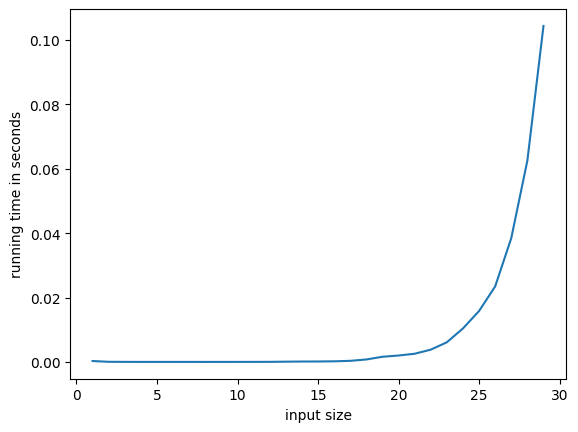

In [86]:
input_arr = [i for i in range(1, 30, 1)]

fun2 = automatic_time(input_arr, bad_fibonacci)
plt.plot(input_arr, fun2, label = "Bad Fibonacci")
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

In [ ]:
# so bad_fibonacci looks like an exponational complexity

In [ ]:
arr = [2**n for n in range(30)]
plt.plot(list(range(30)), arr)
plt.show()

In [ ]:
# sure smells like exponential

In [ ]:
# what is so bad about bad fibonacci ?
# so for each recursive call you get new 2 recursive calls
# it is like that story of inventor of chess in India
# he asked for 1 grain of rice on first square
# 2 on 2nd , 4 on 3rd, 8 on 4th,
# the story modification is that king realized the problem
# to get out of it king said ok, you have to count the rice


In [ ]:
2**32 # he could count half a board

4294967296

In [ ]:
2**64 # not likely for a human...

18446744073709551616

In [87]:


def good_fibonacci(n):
  """Return pair of Fibonacci numbers, F(n) and F(n-1)."""
  if n <= 1:
    return (n,0)
  else:
    (a, b) = good_fibonacci(n-1) # looks linear here
    return (a+b, a) #returning a tuple

In [88]:
good_fibonacci(10)

(55, 34)

In [89]:
good_fibonacci(100)

(354224848179261915075, 218922995834555169026)

In [90]:
%%timeit
good_fibonacci(10)

954 ns ± 14.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%%timeit
good_fibonacci(20)

2.44 µs ± 436 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [91]:
%%timeit
good_fibonacci(30)

4.18 µs ± 1.32 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


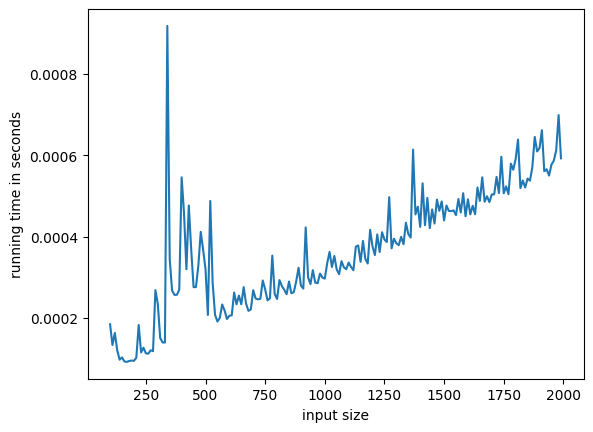

In [92]:
input_arr = [i for i in range(100, 2_000, 10)]

fun2 = automatic_time(input_arr, good_fibonacci)
plt.plot(input_arr, fun2, label="Good Fibonacci")
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

![Recursive calls](https://willrosenbaum.com/assets/img/recursive-fibonacci/tree.png)

Src: https://willrosenbaum.com/teaching/2021s-cosc-112/notes/recursive-fibonacci/

In [94]:
from functools import lru_cache # so we are going to save the intermediate results
# this will help our efficiency tremendously

In [95]:
# we use a decorator to modify our bad fibonacci
@lru_cache(maxsize=None)
def fixing_bad_fibonacci(n):
    """Return the nth Fibonacci number."""
    if n <= 1:
        return n

    return fixing_bad_fibonacci(n-2) + fixing_bad_fibonacci(n-1)

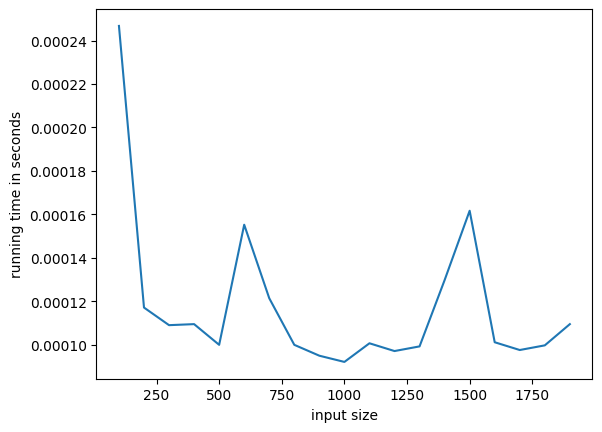

In [96]:
input_arr = [i for i in range(100, 2_000, 100)]

fun2 = automatic_time(input_arr, fixing_bad_fibonacci)
plt.plot(input_arr, fun2, label="Fixed Bad Fibonacci")
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

In [ ]:
import sys
print(sys.getrecursionlimit())

6000


In [ ]:
#https://stackoverflow.com/questions/3323001/what-is-the-maximum-recursion-depth-in-python-and-how-to-increase-it
sys.setrecursionlimit(100_000)
print(sys.getrecursionlimit())

In [ ]:
good_fibonacci(5_000)

In [ ]:
## Fibonacci Solutions

# 1. timing

In [ ]:
def fibonacci_loop(n):
    a, b = 1, 1
    cnt = 3
    while cnt <= n:
        a, b = a+b, a  # Python lets us swap values using tuple unpacking
        cnt += 1
    return a

In [ ]:
fibonacci_loop(2)

1

In [ ]:
fibonacci_loop(10), good_fibonacci(10), bad_fibonacci(10)

(55, (55, 34), 55)

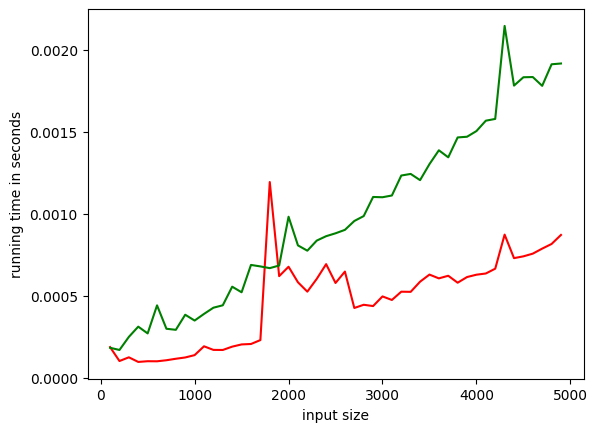

In [ ]:
input_arr = [i for i in range(100, 5_000, 100)]

fun2 = automatic_time(input_arr, fibonacci_loop)
plt.plot(input_arr, fun2, color='red')
fun1 = automatic_time(input_arr, good_fibonacci)
plt.plot(input_arr, fun1, color='green')
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

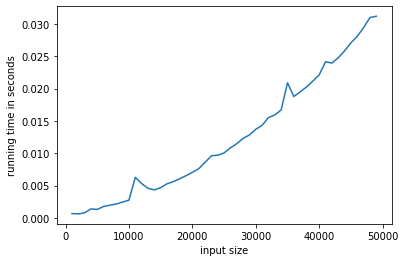

In [ ]:
input_arr = [i for i in range(1000, 50_000, 1000)]

fun2 = automatic_time(input_arr, fibonacci_loop)
plt.plot(input_arr, fun2, label="Loop Fibonacci")
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

In [ ]:
fibonacci_loop(50_000)

1077773489307297478027903885511948082962510676941157978490230921003274473536465230498488444020476029849319433283274054953307539817330483067414835387175554540519844620087346424938072325821301670190811988251618614959586085409937375106530448744637829968513893256636681633131732045918931898863135599612655615546389764030557151405397922601243227304829000716908863786206755177008322693280878498662740588365375937582745087047441929768088349613112971288592851767548484151032523851465334921528252459084466698411101587182887301894506311341515623798245893600417568995720126596157628990959355731402138029685765390557089535847112683962321195360189733388114238140515264593740927152326504059583750815213732368481593236728447575119467557464554422126542220275696283937536759059155955463878564256896667116761467384803801434909803321471265525245144152549832048734930166056768820668771759919744444935935088639508014800544331468556549936334994139143072089673319542213769664519855004306020366507003052291723041808934238051

In [ ]:
# 2. It is not tail recursive becuase there is something to do after returning the values (adding them together). We can use 2 accumulators to avoid this.

# Example: Binary Search

Binary search is a classic recursive algorithm to find a target value within a sorted sequence. This is among the most important of computer algorithms, and it is the reason that we so often store data in sorted order.

e.g. For the sorted sequence below stored in a Python list with indexes above:

<table>
<tr><th>0</th><th>1</th><th> 2</th><th>3</th><th>4</th><th> 5</th><th>6</th><th>7</th><th> 8</th><th>9</th><th>10</th><th> 11</th> </tr>
<tr><td>2</td><td>4</td><td> 5</td><td>6</td><td>8</td><td> 9</td><td>15</td><td>16</td><td> 17</td><td>22</td><td>30</td><td> 31</td> </tr>
</table>

If the sequence was unsorted a simple solution is a _sequential search algorithm_: use a loop to examine every element. You either reach the end of the list or find the target.

It is linear complexity, running in $\mathcal{O}(n)$ time as worst case it inspects every element in the sequence.

A sorted sequence allows a much faster approach. Think about how you would accomplish this task by hand: divide in two, and choose the middle digit as a candidate to compare to the target. Everything to the left of the candidate is lower than it and everything to the right is higher. Compare the target to the candidate and discard the left if the candidate is lower and the right if it is higher. Then repeat your _binary search_ algorithm. This is much more efficient, running in $\mathcal{O}($log$n$) time.

Review the iterative and recursive binary search algorithm implementations below.

In [97]:
def binary_search_iterative(data, target):
    """Return True if target is found in the given Python list."""
    low = 0
    high = len(data)-1
    while low <= high: # so while array/list pointers do not meet we keep going
        mid = (low + high) // 2 # // meaning even half
        if target == data[mid]:         # found a match
            return True
        elif target < data[mid]:
            high = mid - 1                # only consider values left of mid
        else:
            low = mid + 1                 # only consider values right of mid
    return False                      # loop ended without success

In [98]:
def binary_search(data, target, low, high):
    """Return True if target is found in indicated portion of a Python list.

      The search only considers the portion from data[low] to data[high] inclusive.
      """
    if low > high:
        return False                    # interval is empty; no match
    else:
        mid = (low + high) // 2
    if target == data[mid]:         # found a match
        return True
    elif target < data[mid]:
        # recur on the portion left of the middle
        return binary_search(data, target, low, mid - 1)
    else: # target > data[mid]
        # recur on the portion right of the middle
        return binary_search(data, target, mid + 1, high)

When a function makes two recursive calls, we say that it uses binary recursion. Clearly the binary_search above is a binary recursion. Drawing the English ruler and the bad fibonacci function are also examples of binary recursion.

In [99]:
data=[2,4,5,6,8,9,15,16,17,22,30,31,100, 9000, 9001,10_000]
iter_ans = binary_search_iterative(data,100)
iter_ans

True

In [100]:
binary_search_iterative(data,15)

True

In [ ]:
binary_search_iterative(data,7)

In [101]:
%%timeit
binary_search_iterative(list(range(1_000_000)), 9000)
# we might be incuring some extra costs here, why?

48.8 ms ± 3.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [102]:
# better would be to make the list before timing so as not to distort timing for the algorithm itself
million = list(range(1_000_000))
million[-5:]

[999995, 999996, 999997, 999998, 999999]

In [103]:
%%timeit
binary_search_iterative(million, 9000)

2.37 µs ± 111 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [104]:
%%timeit
binary_search(million, 9000, 0, len(million)-1)

3.26 µs ± 636 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
2**32

4294967296

In [ ]:
2**64

18446744073709551616

In [ ]:
# let's creat a list of 100 million integers in a row (this will incur 1 GB RAM even if efficient)
# if you have 100 million * 64bits(8bytes) == 800 million bytes
# however Python list is inefficient for large data so I expect more memory usage
# how much free memory we have now?
# let's import standard library that shows us free memory before we assign 100 million range of integers
import psutil

mem = psutil.virtual_memory()
print(f"Total RAM: {mem.total / (1024**3):.2f} GB")
print(f"Available RAM: {mem.available / (1024**3):.2f} GB")
print(f"Used RAM: {mem.used / (1024**3):.2f} GB")
print(f"Percentage used: {mem.percent}%")

# let's make 100 million integers
hundred_million = list(range(100_000_000))

# now free RAM again
mem = psutil.virtual_memory()
print(f"Total RAM: {mem.total / (1024**3):.2f} GB")
print(f"Available RAM: {mem.available / (1024**3):.2f} GB")
print(f"Used RAM: {mem.used / (1024**3):.2f} GB")
print(f"Percentage used: {mem.percent}%")

Total RAM: 12.67 GB
Available RAM: 11.31 GB
Used RAM: 1.05 GB
Percentage used: 10.8%
Total RAM: 12.67 GB
Available RAM: 7.58 GB
Used RAM: 4.77 GB
Percentage used: 40.2%


In [ ]:
%%timeit
binary_search_iterative(hundred_million, 9000)

5.58 µs ± 1.67 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%%timeit
binary_search(hundred_million, 9000, 0, len(hundred_million)-1)

5.18 µs ± 153 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Time the right thing - exclude data preparation if possible

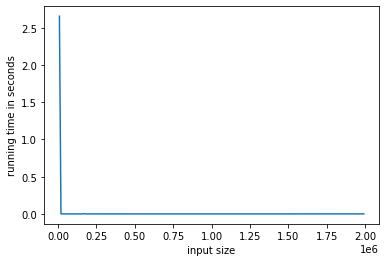

In [ ]:
input_arr = [(list(range(i)), 9000) for i in range(10_000, 2_000_000, 10_000)]

fun1 = automatic_time(input_arr, binary_search_iterative)
plt.plot([len(el[0]) for el in input_arr], fun1)b
# fun2 = automatic_time(input_arr, binary_search) # the recursive one
# plt.plot([len(el[0]) for el in input_arr], fun2)
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

In [ ]:
input_arr = None # let GC handle this

In [ ]:
# so binary search is in log n time we would need a trulyl large data sets to see difference
# most of our time is spent linearly setting up our data sets

In [ ]:
arr = list(range(1_000_000))
big_arr = list(range(100_000_000))

In [ ]:
%%timeit
binary_search(arr, 9000, 0, len(arr)-1)

The slowest run took 4.23 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 5.6 µs per loop


In [ ]:
%%timeit
binary_search_iterative(arr, 9000)

The slowest run took 5.97 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 4.39 µs per loop


In [ ]:
%%timeit
binary_search(big_arr, 9000, 0, len(big_arr)-1)

100000 loops, best of 5: 10.1 µs per loop


In [ ]:
%%timeit
binary_search(big_arr, 50_000_000, 0, len(big_arr)-1) # so this should hit with 1 comparison

The slowest run took 4.86 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 9.82 µs per loop


In [ ]:
%%timeit
binary_search_iterative(big_arr, 9000)

The slowest run took 5.42 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 7.57 µs per loop


In [ ]:
%%timeit
binary_search_iterative(big_arr, 50_000_000) # so this should hit with 1 comparison

100000 loops, best of 5: 7.17 µs per loop


In [ ]:
# so creating a recursive algorithm yourself
# check if problem is already solved
# otherwise reduce problem to simpler instance of the same problem
# in other words Simplify and Delegate the problem

In [ ]:
# all recursive algorithms can be transformed to regular loop based algorithms
# worst case you build your stack for holding the function calls

## Length of an array

In [ ]:
# in case we forgout about len() function ...

In [105]:
def array_len(x):
    if x == []:
        return 0
    else:
        return 1 + array_len(x[1:])

In [106]:
array_len([])

0

In [107]:
array_len([1, 2, 3])

3

In [108]:
array_len(list(range(2961))) # so it looks like 3000 limit is actually 2961 (presumably stack needs space for other functions)

2961

## Sum of the elements in an array

In [ ]:
# in case we forgot about sum() function ...

In [109]:
def array_sum(x):
    if x == []:
        return 0
    else:
        return x[0] + array_sum(x[1:])

In [110]:
array_sum([])

0

In [111]:
array_sum([5])

5

In [112]:
array_sum([1, 2, 3, 4, 5])

15

In [113]:
array_sum(list(range(101))) # remember the formula for summing arithmethic series n(n-1)/2

5050

In [ ]:
array_sum(list(range(2961)))

4382280

# Tower of Hanoi
![tower](https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/Tower_of_Hanoi.jpeg/600px-Tower_of_Hanoi.jpeg)

* must not move more than one disc at a time
* must place this disc on a needle so that there is no smaller disc below it

## Quicksort - more about sorting later on

In [ ]:
def quicksort(array):
    if len(array) < 2:
        return array
    else:
        pivot = array[0]
        smaller, bigger = [], []
        for ele in array[1:]:
            if ele <= pivot:
                smaller.append(ele)
            else:
                bigger.append(ele)
        return quicksort(smaller) + [pivot] + quicksort(bigger)

In [ ]:
quicksort([])

In [ ]:
quicksort([5])

In [ ]:
quicksort([5, 4])

In [ ]:
quicksort([1, 2, 7, 5, 4])

In [ ]:
quicksort([5, 4, 3, 2])

In [ ]:
%pip install psutil

In [ ]:
import psutil

mem = psutil.virtual_memory()
print(f"Total RAM: {mem.total / (1024**3):.2f} GB")
print(f"Available RAM: {mem.available / (1024**3):.2f} GB")
print(f"Used RAM: {mem.used / (1024**3):.2f} GB")
print(f"Percentage used: {mem.percent}%")

Total RAM: 12.67 GB
Available RAM: 11.58 GB
Used RAM: 0.78 GB
Percentage used: 8.7%
